In [29]:

import pandas as pd
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt

 

In [9]:
df = pd.read_csv("Data/heroes_completo-Copy1.csv")
df.head(5)

,ID,Nombre,Inteligencia,Fuerza,Velocidad,Durabilidad,Potencia,Combate,Genero,Etnia,Altura,Peso,Color_Ojos,Color_Pelo,Nombre Completo,Alias,Lugar de nacimiento,Primera aparición,Editor,Alineación
0,1,A-Bomb,38,100,17,80,24,64,Male,Human,203 cm,441 kg,Yellow,No Hair,Richard Milhouse Jones,Rick Jones,"Scarsdale, Arizona","Hulk Vol 2 #2 (April, 2008) (as A-Bomb)",Marvel Comics,good
1,2,Abe Sapien,88,28,35,65,100,85,Male,Icthyo Sapien,191 cm,65 kg,Blue,No Hair,Abraham Sapien,"Langdon Everett Caul, Abraham Sapien, Langdon ...",-,Hellboy: Seed of Destruction (1993),Dark Horse Comics,good
2,3,Abin Sur,50,90,53,64,99,65,Male,Ungaran,185 cm,90 kg,Blue,No Hair,NaN,Lagzia,Ungara,"Showcase #22 (October, 1959)",DC Comics,good
3,4,Abomination,63,80,53,90,62,95,Male,Human / Radiation,203 cm,441 kg,Green,No Hair,Emil Blonsky,"Agent R-7, Ravager of Worlds","Zagreb, Yugoslavia",Tales to Astonish #90,Marvel Comics,bad
4,5,Abraxas,88,63,83,100,100,55,Male,Cosmic Entity,0 cm,0 kg,Blue,Black,Abraxas,-,Within Eternity,Fantastic Four Annual #2001,Marvel Comics,bad


In [44]:
df1 = df.drop(["Color_Ojos", "Color_Pelo"], axis=1)
df1.head(3)

,ID,Nombre,Inteligencia,Fuerza,Velocidad,Durabilidad,Potencia,Combate,Genero,Etnia,Altura,Peso,Nombre Completo,Alias,Lugar de nacimiento,Primera aparición,Editor,Alineación
0,1,A-Bomb,38,100,17,80,24,64,Male,Human,203 cm,441 kg,Richard Milhouse Jones,Rick Jones,"Scarsdale, Arizona","Hulk Vol 2 #2 (April, 2008) (as A-Bomb)",Marvel Comics,good
1,2,Abe Sapien,88,28,35,65,100,85,Male,Icthyo Sapien,191 cm,65 kg,Abraham Sapien,"Langdon Everett Caul, Abraham Sapien, Langdon ...",-,Hellboy: Seed of Destruction (1993),Dark Horse Comics,good
2,3,Abin Sur,50,90,53,64,99,65,Male,Ungaran,185 cm,90 kg,NaN,Lagzia,Ungara,"Showcase #22 (October, 1959)",DC Comics,good


In [45]:
#preguntasSUPERHEROES
 
#1¿ Cual es el superheroe con mas potencia, mas veloz(velocidad) y mas poder de combate?
#2 ¿En base a promediar (mediana) la inteligencia y la fuerza, ¿Cual es el superheroe que combinada estas dos habilidades tiene el mayor y menor promedio? 
#3¿Filtrar por genero, indicar la proporcion de hombres y mujeres , indicar la etnia mas dominante de cada genero? 
# ¿ El genero masculino es mas rapido que el femenino? Anxo
#4¿ Calcular cuales son los superheroes mas altos , mas bajos y mas pesados (indicar los 3 primeros)? 
# ¿Cual es la relacion entre el peso y la altura? Anxo
#5¿Cual es la aparicion mas antigua y mas nueva , en que lugar nacio es superheroe y cual es su Alias?
#6¿Cuantos superheroes buenos y malos existen? ¿Cual es la coherelacion entre la aliniacion del superheroe y el editor? 
# ¿Que editor tiene mas superheroes buenos y/o malos?

In [46]:
#3¿Filtrar por genero, indicar la proporcion de hombres y mujeres , indicar la etnia mas dominante de cada genero? 
# ¿ El genero masculino es mas rapido que el femenino? Anxo

In [47]:
def filtrar_por_genero(df, genero):
    genero = genero.lower()
    return df[df["Genero"].str.lower() == genero]


In [48]:
df_hombres = filtrar_por_genero(df, "male")
df_hombres.value_counts("Genero")

Genero
Male    502
Name: count, dtype: int64

In [49]:
df_mujeres = filtrar_por_genero(df, "female")
df_mujeres.value_counts("Genero")


Genero
Female    200
Name: count, dtype: int64

In [50]:
proporciones = df["Genero"].value_counts(normalize=True)
proporciones

Genero
Male      0.686731
Female    0.273598
-         0.039672
Name: proportion, dtype: float64

<Axes: title={'center': 'Distribución por género'}, ylabel='count'>

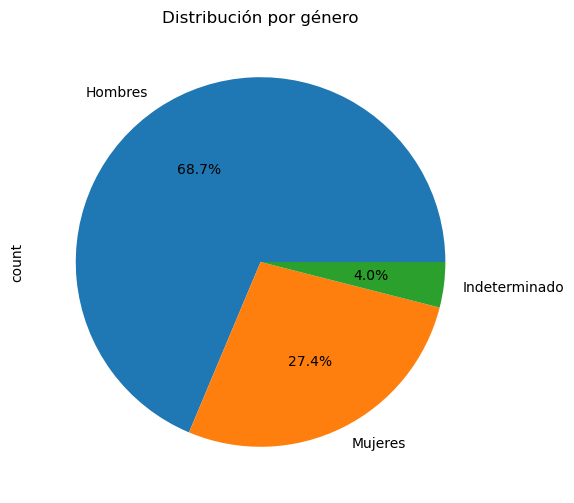

In [51]:
conteo = df["Genero"].value_counts().rename(index={
    "Male": "Hombres",
    "Female": "Mujeres",
    "-": "Indeterminado"
})

conteo.plot(
    kind="pie",
    autopct="%1.1f%%",
    figsize=(6,6),
    title="Distribución por género"
)


In [55]:
# Etnia más frecuente por género
for genero in ["Male", "Female", "-"]:
    etnia = df1[df1["Genero"] == genero]["Etnia"]
    
    if not etnia.empty:
        etnia_dominante = etnia.mode()[0]
        print(f"Etnia más dominante de {genero}: {etnia_dominante}")
    else:
        print(f"No hay datos de etnia para {genero}")


Etnia más dominante de Male: Human
Etnia más dominante de Female: Human
Etnia más dominante de -: Cosmic Entity


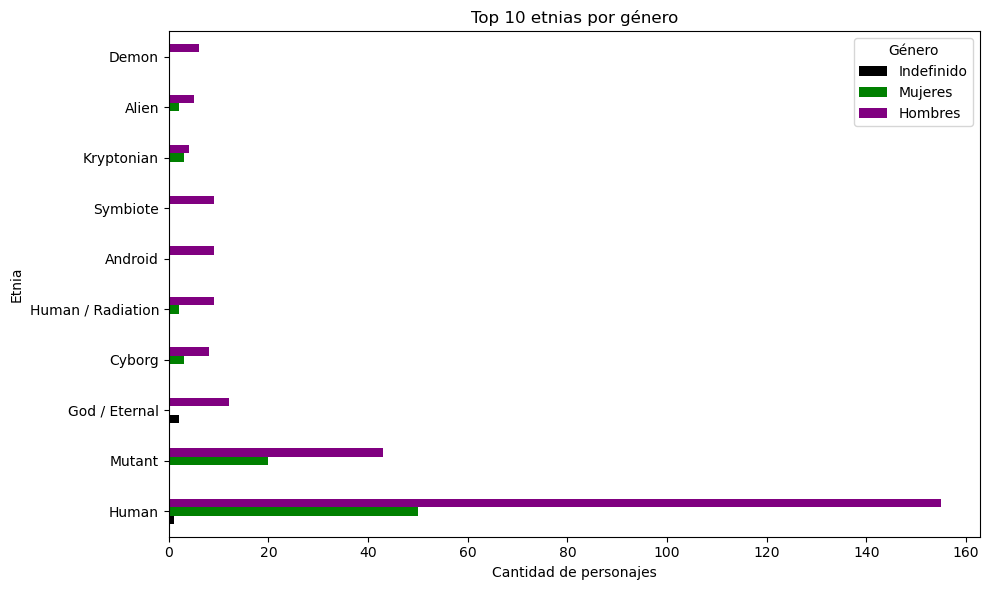

In [79]:
# Contar etnias por género
tabla = pd.crosstab(df1["Etnia"], df1["Genero"])

# Tomar solo las 10 etnias con más personajes en total
tabla["Total"] = tabla.sum(axis=1)
tabla_top = tabla.sort_values("Total", ascending=False).head(10)
tabla_top = tabla_top.drop("Total", axis=1)

# Graficar
tabla_top.plot(kind="barh", figsize=(10, 6),
     color=["black", "green", "purple"])
plt.xlabel("Cantidad de personajes")
plt.ylabel("Etnia")
plt.title("Top 10 etnias por género")
plt.legend(["Indefinido", "Mujeres", "Hombres"], title="Género")

plt.tight_layout()
plt.show()


In [66]:
# Convertimos speed a numérico, los valores que no se puedan convertir se vuelven NaN
df["Velocidad"] = pd.to_numeric(df["Velocidad"], errors="coerce")


# Filtramos solo Male y Female y eliminamos valores nulos en velocidad
df_vel = df[df["Genero"].isin(["Male", "Female"]) & df["Velocidad"].notna()]

# Calculamos la media de velocidad por género
vel_media = df_vel.groupby("Genero")["Velocidad"].mean()
print("Velocidad media por género:")
print(vel_media)


Velocidad media por género:
Genero
Female    37.032680
Male      41.138191
Name: Velocidad, dtype: float64


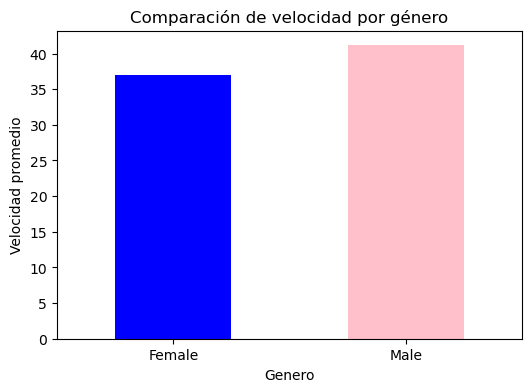

In [70]:

vel_media.plot(kind="bar", color=["blue", "pink"], figsize=(6,4))
plt.ylabel("Velocidad promedio")
plt.title("Comparación de velocidad por género")
plt.xticks(rotation=0)
plt.show()
